# Week 1 Day 1: Load and Inspect World Bank GDP per Capita Data

**Project Goal:**  
For this project, I am sourcing GDP per capita (current US$) data from the World Bank's World Development Indicators database. 
The goal for Week 1 Day 1 is to load the dataset, inspect its structure, and make sure it is ready for cleaning and analysis in the next steps.

**Cell Objective:**  
This cell imports pandas, loads the GDP per capita CSV file into a DataFrame, and inspects the first rows, shape, and columns to understand the dataset structure.


In [1]:
# Step 1: Import pandas library
import pandas as pd

# Step 2: Load the GDP per capita CSV file into a pandas DataFrame
gdp_data = pd.read_csv('../data/world_bank_gdp_per_capita.csv')

# Step 3: Display the first 5 rows to inspect the data
gdp_data.head()




,Country Name,Country Code,Series Name,Series Code,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],...,2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023],2024 [YR2024]
0,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,174.930991430166,138.706821676113,178.954088379235,198.871115728727,221.763653873013,254.184249149336,...,565.569730408751,522.082215583898,525.469770891619,491.337221382603,496.6025042585,510.787063366811,356.496214115892,357.261152798144,413.757894705303,..
1,Albania,ALB,GDP per capita (current US$),NY.GDP.PCAP.CD,1160.42047054038,1326.41652388077,1479.83884572006,1908.69900687608,2446.90949947798,2741.72136549578,...,4199.53912925398,4457.63412207495,5006.36012951959,5897.65452588774,6069.43903131027,6027.91350716348,7242.45513146613,7756.96188744253,9730.86921906893,11377.7757431099
2,Algeria,DZA,GDP per capita (current US$),NY.GDP.PCAP.CD,1772.92869122761,1896.30020878013,1937.46411413019,2283.77299346126,2816.99384960555,3233.13339634212,...,4685.05902729002,4424.98529027556,4554.66753957828,4577.21029180491,4468.45341883656,3743.5419522929,4160.55926736925,4960.30334332888,5370.477235078,5752.99076651465
3,American Samoa,ASM,GDP per capita (current US$),NY.GDP.PCAP.CD,..,..,8972.69636535698,9197.66196836987,8958.42866697173,8831.26975996609,...,12727.4102651386,12843.3342903627,11863.6839452565,12552.0546868861,12886.1359517218,14489.2586563775,15236.1604875571,18017.4589383973,..,..
4,Andorra,AND,GDP per capita (current US$),NY.GDP.PCAP.CD,21810.2503808666,23511.2969500881,26528.1300628236,34063.575598394,39021.1107100919,40829.8116399538,...,38654.95287916,40129.8385811474,40672.9717424447,42819.7577456133,41257.816459345,37361.1070081615,42425.7066454357,42414.0479861228,46812.4261013102,49303.6491674336


In [2]:
# Step 4: Optional - check the shape of the dataset (rows, columns)
print("Dataset shape:", gdp_data.shape)

Dataset shape: (222, 29)


In [3]:
# Step 5: Optional - see the column names
print("Columns:", gdp_data.columns.tolist())

Columns: ['Country Name', 'Country Code', 'Series Name', 'Series Code', '2000 [YR2000]', '2001 [YR2001]', '2002 [YR2002]', '2003 [YR2003]', '2004 [YR2004]', '2005 [YR2005]', '2006 [YR2006]', '2007 [YR2007]', '2008 [YR2008]', '2009 [YR2009]', '2010 [YR2010]', '2011 [YR2011]', '2012 [YR2012]', '2013 [YR2013]', '2014 [YR2014]', '2015 [YR2015]', '2016 [YR2016]', '2017 [YR2017]', '2018 [YR2018]', '2019 [YR2019]', '2020 [YR2020]', '2021 [YR2021]', '2022 [YR2022]', '2023 [YR2023]', '2024 [YR2024]']


## Week 1 Day 2: Data Cleaning and Reshaping

**Objective:**  
Prepare the World Bank GDP per capita dataset for analysis by cleaning the data, handling missing values, and reshaping it into a tidy long format suitable for time-series analysis and visualization.

**Key Steps Performed:**
- Assessed missing values in the dataset  
- Removed unnecessary indicator columns  
- Reshaped the data from wide to long format  
- Standardized column names  
- Converted data types for analysis  
- Saved a cleaned, analysis-ready dataset  

In [1]:
import pandas as pd
gdp_data = pd.read_csv('../data/world_bank_gdp_per_capita.csv')


In [3]:
# checking for missing values.
gdp_data.isna().sum().head()

Country Name     3
Country Code     5
Series Name      5
Series Code      5
2000 [YR2000]    5
dtype: int64

In [5]:
# dropping unnecesary columns.
gdp_data_clean = gdp_data.drop(columns=['Series Name', 'Series Code'])

In [7]:
# reshaping the dataset from wide into (tidy)long format using pandas melt making it suitable for time-series analysis.
gdp_long = gdp_data_clean.melt(
    id_vars=['Country Name', 'Country Code'],
    var_name='year',
    value_name='gdp_per_capita'
)

In [8]:
# renaming the columns name
gdp_long.columns = [
    'country',
    'country_code',
    'year',
    'gdp_per_capita'
]


In [10]:
# converting the data types because Years must be numeric for filtering/plotting and GDP for analysis
gdp_long['year'] = gdp_long['year'].str.extract('(\d{4})')
gdp_long['year'] = gdp_long['year'].astype(int)

gdp_long['gdp_per_capita'] = pd.to_numeric(gdp_long['gdp_per_capita'], errors='coerce')


In [11]:
# dropping rows with missing GDP
gdp_long = gdp_long.dropna(subset=['gdp_per_capita'])


In [12]:
# checking the cleaned data
print(gdp_long.head())
print("Cleaned dataset shape:", gdp_long.shape)

       country country_code  year  gdp_per_capita
0  Afghanistan          AFG  2000      174.930991
1      Albania          ALB  2000     1160.420471
2      Algeria          DZA  2000     1772.928691
4      Andorra          AND  2000    21810.250381
5       Angola          AGO  2000      563.733796
Cleaned dataset shape: (5233, 4)


In [13]:
# saving the cleaned dataset
gdp_long.to_csv(
    '../data/world_bank_gdp_per_capita_clean.csv',
    index=False)

## Week 1 Day 3: Exploratory Data Analysis (EDA)

### Objective
The goal of this step is to explore the cleaned World Bank GDP per capita dataset in order to:
- Understand global income trends over time
- Compare income levels across countries
- Identify broad patterns and disparities in economic development

### Analysis Approach
- Load the cleaned dataset produced in Day 2
- Examine dataset coverage across years and countries
- Aggregate GDP per capita by year to analyze global trends
- Compare countries using rankings and visualizations

### Notes
Key observations will be documented after reviewing the results of the analysis.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

gdp_clean = pd.read_csv('../data/world_bank_gdp_per_capita_clean.csv')
gdp_clean.head()


,country,country_code,year,gdp_per_capita
0,Afghanistan,AFG,2000,174.930991
1,Albania,ALB,2000,1160.420471
2,Algeria,DZA,2000,1772.928691
3,Andorra,AND,2000,21810.250381
4,Angola,AGO,2000,563.733796


In [2]:
# understand the data size and coverage
print("Shape:", gdp_clean.shape)
print("Years range:", gdp_clean['year'].min(), "-", gdp_clean['year'].max())
print("Number of countries:", gdp_clean['country'].nunique())


Shape: (5233, 4)
Years range: 2000 - 2024
Number of countries: 214


In [3]:
# Compute global average per year
global_trend = (
    gdp_clean
    .groupby('year')['gdp_per_capita']
    .mean()
    .reset_index()
)


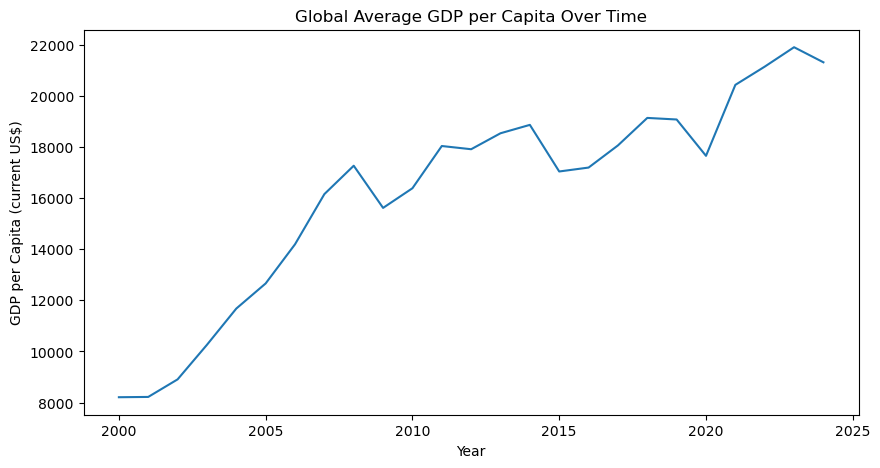

In [4]:
# Plotting the trend
plt.figure(figsize=(10, 5))
plt.plot(global_trend['year'], global_trend['gdp_per_capita'])
plt.title('Global Average GDP per Capita Over Time')
plt.xlabel('Year')
plt.ylabel('GDP per Capita (current US$)')
plt.show()


In [5]:
# comparing countries (Top 10 countries by GDP per capita (latest year))
latest_year = gdp_clean['year'].max()

top_countries = (
    gdp_clean[gdp_clean['year'] == latest_year]
    .sort_values('gdp_per_capita', ascending=False)
    .head(10)
)

top_countries[['country', 'gdp_per_capita']]


,country,gdp_per_capita
5156,Monaco,288001.433369
5060,Bermuda,142855.374714
5142,Luxembourg,137781.681659
5123,Ireland,112894.953241
5209,Switzerland,103998.186686
5194,Singapore,90674.066633
5172,Norway,86785.433449
5118,Iceland,86040.530985
5224,United States,84534.040784
5183,Qatar,76688.694174


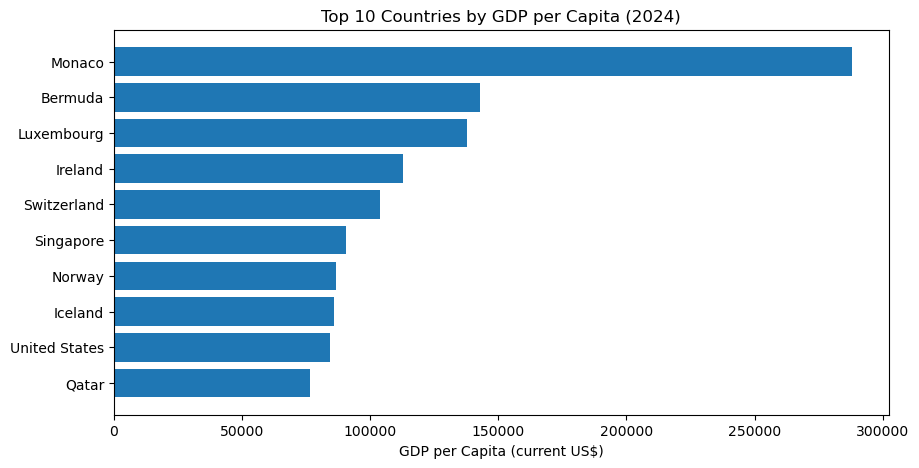

In [6]:
plt.figure(figsize=(10, 5))
plt.barh(top_countries['country'], top_countries['gdp_per_capita'])
plt.xlabel('GDP per Capita (current US$)')
plt.title(f'Top 10 Countries by GDP per Capita ({latest_year})')
plt.gca().invert_yaxis()
plt.show()


### Observations

- Global average GDP per capita increases over time, indicating long-term income growth at the global level.
- The trend is uneven, with periods of slower growth rather than a smooth increase.
- GDP per capita varies widely across countries, with high-income economies consistently ranking at the top.


## Conclusions

This project analyzed global GDP per capita trends using World Bank data. 
The workflow covered data sourcing, cleaning, reshaping, and exploratory analysis. 
The results highlight long-term global growth alongside persistent differences 
between countries. This analysis establishes a solid foundation for deeper 
economic or regional exploration.
